In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [5]:
data = pd.read_csv("IMDBDataset.csv")
print(data)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


In [6]:
reviews=data["review"]

In [7]:
labels=data["sentiment"]

In [9]:
# Split dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(reviews, labels, test_size=0.2,random_state=42)

In [10]:
# Create a Naïve Bayes classification pipeline
text_clf = Pipeline([('vectorizer', CountVectorizer()), # Convert text into numerical data (Bag ofWords)
('tfidf', TfidfTransformer()), # Apply TF-IDF transformation
('classifier', MultinomialNB()) # Train using Multinomial Naïve Bayes
])

In [11]:
# Train the classifier
text_clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [12]:
# Make predictions on the test set
y_pred = text_clf.predict(X_test)

In [13]:
# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.89      0.87      4961
    positive       0.88      0.84      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [14]:
# Print accuracy score
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.8635


In [15]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(conf_matrix, index=["Negative", "Positive"],
columns=["Negative", "Positive"])

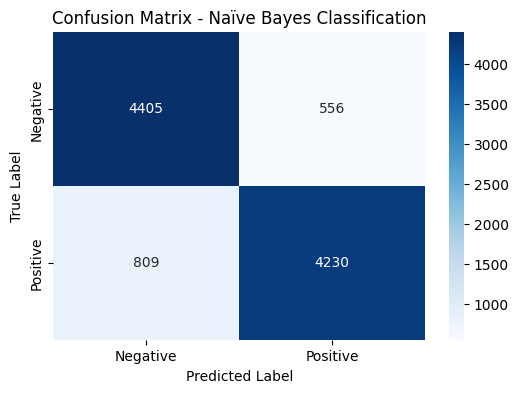

In [16]:
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(df_cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Naïve Bayes Classification")
plt.show()

In [17]:
# Predict sentiment for new movie reviews
new_reviews = [
"The script and direction were absolutely brilliant.",
"I regret watching this dull and predictable movie.",
"A heartwarming story with great character development."
]

In [18]:
# Make predictions on new data
predicted_labels = text_clf.predict(new_reviews)

In [19]:
# Print predictions
for review, label in zip(new_reviews, predicted_labels):
    print(f"'{review}' -> Predicted Sentiment: {label}")

'The script and direction were absolutely brilliant.' -> Predicted Sentiment: negative
'I regret watching this dull and predictable movie.' -> Predicted Sentiment: negative
'A heartwarming story with great character development.' -> Predicted Sentiment: positive
